In [1]:
import networkx as nx 
from math import sqrt,ceil
import matplotlib.pyplot as plt
import numpy as np
import time
from timeit import timeit
import random

In [2]:
web_graph = nx.read_gpickle("web_graph.gpickle")

In [3]:
def getPrincipalEV(mat):
    """
    Function to compute principal eigen vector for a given matrix
    """
    values, Vector = np.linalg.eig(mat)
    prin_EV = Vector[:,np.argmax(values)].T
    princiapl_Ev = (prin_EV/prin_EV.sum()).real
    return princiapl_Ev


def power_iteration_iter(matrix, max_iter=100):
    """
    Compute the left eigen vector using the power iteration method
    Inputs: matrix
    max_iters (optional) defaults to 100
    """
    n = prob_matrix.shape[0]
    eigen_vector = np.ones((n,1))
    for i in range(max_iter):
        eigen_vector = prob_matrix@eigen_vector
        eigen_vector = eigen_vector/np.sum(eigen_vector)
    return eigen_vector

def HITS(G,iters = 0):
    """
    Hyperlink-Induced Topic Search (HITS; also known as hubs and authorities) 
    \nInput :
    G -> Graph
    \niters = No of iterations for `power_iteration_iter()` method, default is 0 (uses numpy to calculate)
    \nReturns :
    Hub and Authorities score for given set of nodes
    """
    A = nx.adjacency_matrix(G).todense()
    n = A.shape[0]
    A = A.astype('float64')
    if iters == 0:
        h= getPrincipalEV(A@A.T)
        a= getPrincipalEV(A.T@A)
    else:
        h = power_iteration_iter(A@A.T,iters)
        a = power_iteration_iter(A.T@A,iters)
    h = h.flatten()
    h_new = np.squeeze(np.asarray(h))
    a_new = np.squeeze(np.asarray(a))
    hubs = dict(zip(G, map(float, h_new)))
    authorities = dict(zip(G, map(float, a_new)))
    return hubs,authorities


def getBaseSet(G,rootSet):
    """
    Function returns the base set for a given graph and rootset
    \nInput :
    G -> graph
    rootSet ->rootSet
    \nReturns :
    nodes -> corresponding to the base set for given graph and rootset
    """
    nodes = []
    for node in rootSet:
        nodes.append(node)
        for e in G.predecessors(node):
            nodes.append(e)
        for e in G.successors(node):
            nodes.append(e)
    return nodes

In [4]:
def convert_adj_to_prob(adj_matrix, teleport=0.0):
    """
    Converts a given adjacency matrix to a probability translation matrix
    Inputs:
    Adjacency Matrix
    teleport probability (alpha)
    """
    n = adj_matrix.shape[0]
    prob_matrix = np.zeros((n, n))
    row_sum = np.sum(adj_matrix, axis=1)
    teleport_prob = teleport / n
    for i in range(n):
        for j in range(n):
            if adj_matrix[i, j] == 1:
                prob_matrix[i, j] = ((1-teleport)*adj_matrix[i, j]) / (row_sum[i]) + teleport_prob
            else:
                prob_matrix[i, j] = teleport_prob
    return prob_matrix

In [5]:
def getLeftEigenVector(P):
    """
    Compute the left eigen vector for a given probability translation matrix using numpy
    """
    values, Vector = np.linalg.eig(np.array(P).T)
    left_vec = Vector[:, np.argmax(values)].T
    left_vec_norm = (left_vec/left_vec.sum()).real
    return left_vec_norm

In [6]:
def power_iteration(prob_matrix, max_iter=100):
    """
    Compute the left eigen vector using the power iteration method
    Inputs: prob_matrix
    max_iters (optional) defaults to 100
    """
    n = prob_matrix.shape[0]
    eigen_vector = np.zeros(n)
    eigen_vector[0] = 1
    for i in range(max_iter):
        eigen_vector = prob_matrix.T @ eigen_vector
    return eigen_vector

In [27]:
def pageRank(G,prob):
  adj = nx.adjacency_matrix(G).todense()
  P  = convert_adj_to_prob(np.array(adj),prob)
  return getLeftEigenVector(P)

In [38]:
time_el = []
for i in range(3,150):        
  print(i)
  e= random.randint(1, i * (i - 1))
  t = nx.gnm_random_graph(i,e,directed=True)
  #time_el.append(1000*timeit(lambda: pageRank(t,0.1),number=10))
  time_el.append(1000*timeit(lambda: HITS(t),number=10))

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149


In [39]:
x = np.arange(3,150)   


Text(0, 0.5, 'Time (in ms)')

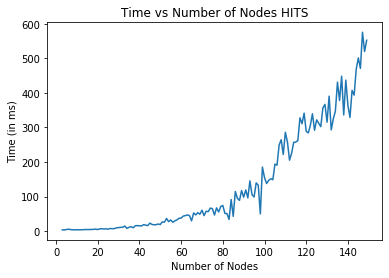

In [40]:
plt.plot(x,time_el)
plt.title("Time vs Number of Nodes HITS")
plt.xlabel("Number of Nodes")
plt.ylabel("Time (in ms)")

In [ ]:
# With trend line
z = np.polyfit(x, time_el, 1)
p = np.poly1d(z)
plt.plot(x**2,time_el)
temp_x = x**2
temp_x = temp_x[10:]
plt.plot(temp_x, p(x[10:]), "--")
plt.legend(["original data","Trend line"])
plt.title("Time vs Number of Nodes HITS")
plt.xlabel("Number of Nodes^2")
plt.ylabel("Time (in ms)")